# MODEL 

Cargamos las librerias necesarias

In [1]:
from _utils import *
import pandas as pd

## Cargamos la data

In [ ]:
# dataset = pd.read_json("./datasets/market_data.json", orient="records")
df_coin = pd.read_json("./datasets/coin.json")
df_coin.set_index("datetime", inplace=True)
df_coin

## Preparamos la data

In [272]:
import numpy as np
from matplotlib import pyplot as plt

In [273]:
def get_series_by_coin(coin: str, df: pd.DataFrame):
    new_df = df.where(df["name"] == coin).dropna()
    return new_df

In [274]:
# df_bitcoin = get_series_by_coin("Bitcoin",dataset)
df_bitcoin = pd.read_json("./datasets/bitcoin.json")
df_bitcoin.set_index("datetime", inplace=True)
df_bitcoin = df_bitcoin.sort_index()
df_bitcoin.head(5)

,id,serialId,symbol,name,slug,open,high,low,close,volume
datetime,,,,,,,,,,
2016-02-07,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,376.030182,382.416109,372.510785,376.678016,4.532929e+08
2016-02-08,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,377.824362,382.104274,371.106554,373.071537,4.539467e+08
2016-02-09,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,374.366660,377.633699,371.134725,374.419881,4.221380e+08
2016-02-10,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,375.245206,385.045611,373.279047,380.798141,6.877410e+08
2016-02-11,1e31218a-e44e-4285-820c-8282ee222035,6057,BTC,Bitcoin,bitcoin,380.679593,384.303153,373.702775,379.643758,4.435501e+08


# Estacionalidad

In [275]:
# Va del 1 de enero de 2009 al 24 de septiembre de 2014
# Es decir casi 6 años
print(df_bitcoin.index[0])
print(df_bitcoin.index[-1])
print(df_bitcoin.index[-1]-df_bitcoin.index[0])

2016-02-07 00:00:00
2024-04-20 00:00:00
2995 days 00:00:00


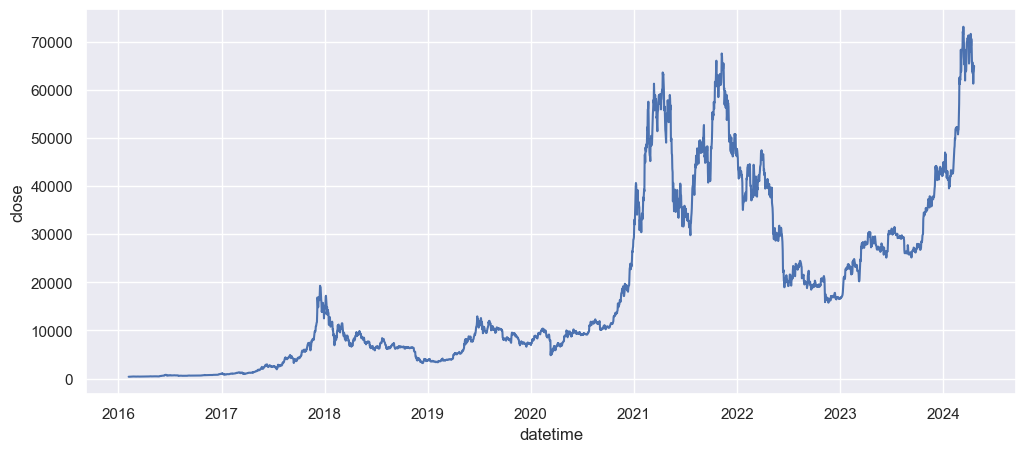

In [276]:
# Importar seaborn
import plotly.express as px
import numpy as np
import seaborn as sns
sns.set()

# Extraer
temp = df_bitcoin['close']

# Y graficarla
fig, ax = plt.subplots(figsize=(12,5))
sns.lineplot(temp, ax=ax);

In [277]:
# 0. Parámetros de la serie de tiempo
N = len(temp)      # Cantidad de muestras: [muestras]
muestras = 1           # Número de muestras/horas: [muestras/h]

# 1. Calcular la magnitud de la Transformada de Fourier derecha
tf = np.abs(np.fft.rfft(temp,N))

# 2. Calcular vector frecuencias (eje horizontal)
frecs = np.fft.rfftfreq(N, d=1./muestras)

# 3. Graficar
# Como tenemos 1 muestra por hora pero la serie dura varios años
# usaremos una escala logarítmica en el eje horizontal
fig = px.line(x=frecs, y=tf, log_x=True)
fig.update_layout(xaxis_title=f'Frecuencia')
fig.show()

In [278]:
frec1 = 0.004021
frec2 = 0.001340

print(f'La frecuencia {frec1} equivale a {1/frec1} dias')
print(f'La frecuencia {frec2} equivale a {1/frec2} dias')

La frecuencia 0.004021 equivale a 248.6943546381497 dias
La frecuencia 0.00134 equivale a 746.2686567164179 dias


In [279]:
resultado = (1/frec1)*(1/365.25)
print(f'La frecuencia {frec1} equivale a {resultado} años')

La frecuencia 0.004021 equivale a 0.680888034601368 años


# Creado la variable

In [280]:
# df_coin = df_bitcoin

In [281]:
# Codificar cada combinación AAAA-MM-DD HH:MM:SS a su representación
# en segundos
tiempo_s = df_coin.index.map(pd.Timestamp.timestamp)
tiempo_s

Index([1454803200.0, 1454889600.0, 1454976000.0, 1455062400.0, 1455148800.0,
       1455235200.0, 1455321600.0, 1455408000.0, 1455494400.0, 1455580800.0,
       ...
       1712793600.0, 1712880000.0, 1712966400.0, 1713052800.0, 1713139200.0,
       1713225600.0, 1713312000.0, 1713398400.0, 1713484800.0, 1713571200.0],
      dtype='float64', name='datetime', length=3020)

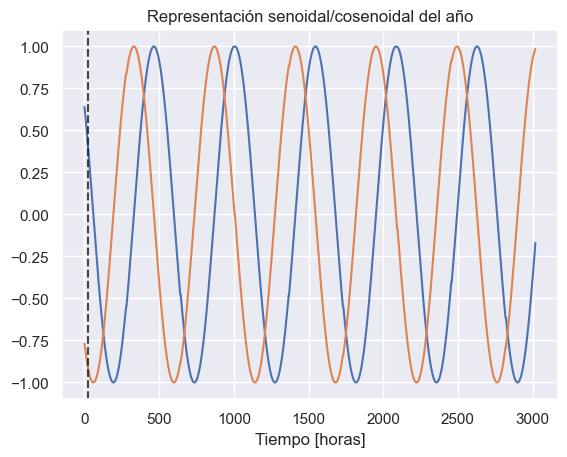

In [282]:
# Definir 1 día en segundos como 24 horas x 60 min x 60 s
dia = 24 * 60 * 60
year = (365.2425) * dia / resultado  # Valor de un año en segundos
# Representar el día senoidal y cosenoidalmente
# La frecuencia de la función será 1/día

# Representar la hora con senos y cosenos
year_sin = np.sin(tiempo_s * (2 * np.pi / year))
year_cos = np.cos(tiempo_s * (2 * np.pi / year))

# Graficar 2 días (48 horas)
fig, ax = plt.subplots()
plt.plot(np.array(year_sin))
plt.plot(np.array(year_cos))
plt.xlabel("Tiempo [horas]")
plt.title("Representación senoidal/cosenoidal del año")

# Dibujar línea vertical en 24 horas
ax.axvline(24, color="k", linestyle="--", alpha=0.8)

# Preparacion

In [283]:
df_coin.drop(columns=["name","id","serialId","symbol","slug"], inplace=True)

In [284]:
df_coin['year_sin'] = np.sin(tiempo_s * (2 * np.pi / year))
df_coin['year_cos'] = np.cos(tiempo_s * (2 * np.pi / year))
df_coin.head(3)

,open,high,low,close,volume,bitcoin_open,bitcoin_high,bitcoin_low,bitcoin_close,bitcoin_volume,year_sin,year_cos
datetime,,,,,,,,,,,,
2016-02-07,0.000169,0.000186,0.000161,0.000169,9466.081586,376.030182,382.416109,372.510785,376.678016,4.532929e+08,0.639666,-0.768653
2016-02-08,0.000166,0.000178,0.000163,0.000171,5863.766168,377.824362,382.104274,371.106554,373.071537,4.539467e+08,0.630619,-0.776093
2016-02-09,0.000172,0.000183,0.000164,0.000169,4269.864284,374.366660,377.633699,371.134725,374.419881,4.221380e+08,0.621485,-0.783426


In [285]:
#Variables for training
# numerical variables
cols = df_coin.select_dtypes(include=[np.number]).columns
print(cols) 

Index(['open', 'high', 'low', 'close', 'volume', 'bitcoin_open',
       'bitcoin_high', 'bitcoin_low', 'bitcoin_close', 'bitcoin_volume',
       'year_sin', 'year_cos'],
      dtype='object')


In [286]:
cols = [
    # "bitcoin_change_open",
    # "bitcoin_change_high",
    # "bitcoin_change_low",
    # "bitcoin_change_close",
    # "bitcoin_change_volume",
    # "year_sin",
    # "year_cos",
    # "change_open",
    # "change_high",
    # "change_low",
    # "change_close",
    # "change_volume",
    
    "bitcoin_open",
    # "bitcoin_high",
    # "bitcoin_low",
    # "bitcoin_close",
    # "bitcoin_volume",
    "open",
    "high",
    "low",
    "volume",
    "close",
]

In [287]:
for i, col in enumerate(cols):
    print(i,col)

0 bitcoin_open
1 open
2 high
3 low
4 volume
5 close


Preparamos los datos para series de tiempo

In [288]:
# Función para generar las particiones preservando las características
# de la serie de tiempo
def train_val_test_split(dataframe, tr_size=0.8, vl_size=0.1):
    # Definir número de datos en cada subserie
    N = dataframe.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación

    # Realizar partición
    train = dataframe[0:Ntrain]
    val = dataframe[Ntrain:Ntrain+Nval]
    test = dataframe[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(df_coin[cols])

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (2416, 6)
Tamaño set de validación: (302, 6)
Tamaño set de prueba: (302, 6)


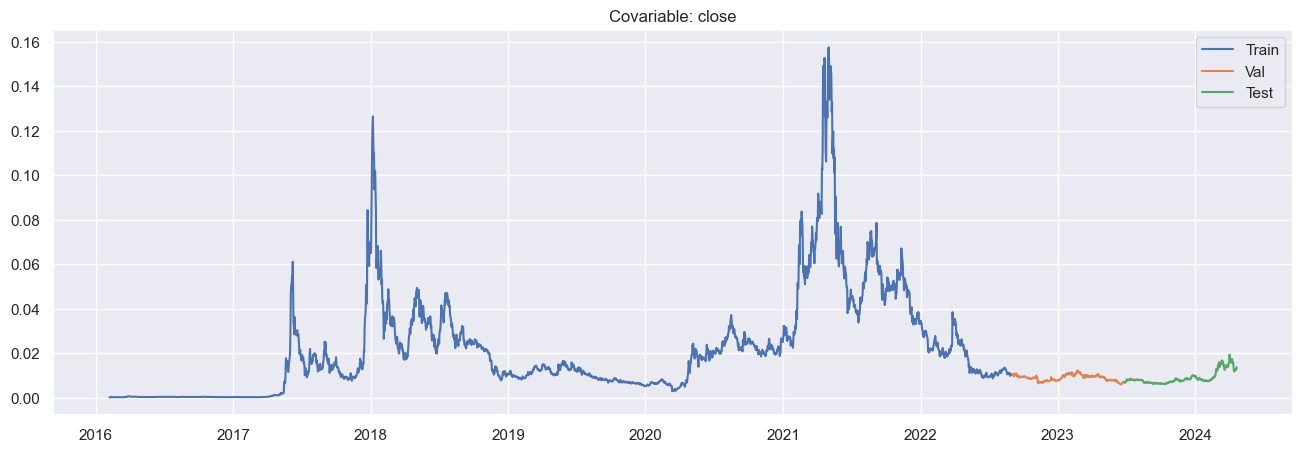

In [289]:
covar = 3 # Índice de la covariable (columna del dataset) a graficar
col = df_coin.columns[covar]

# Dibujar los sets de entrenamiento/validación/prueba para la covariable
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr[col], label='Train')
ax.plot(vl[col], label='Val')
ax.plot(ts[col], label='Test')
ax.set_title(f'Covariable: {col}')
plt.legend();

In [290]:
def create_windows(data, input_length, output_length, train_size=0.8):
    # Inicialización
    X = []
    Y = []
    shape = data.shape

    # Asegurar que los datos estén en el formato correcto para multivariable
    if len(shape) == 1:  # Si es univariado
        data = data.reshape(-1, 1)

    fils, cols = data.shape

    # Generar los arreglos
    for i in range(fils - input_length - output_length):
        X.append(data[i : i + input_length, :])
        Y.append(data[i + input_length : i + input_length + output_length, :])

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    # Dividir en conjuntos de entrenamiento y prueba
    split_index = int(train_size * len(X))

    X_train, X_test = X[:split_index], X[split_index:]
    Y_train, Y_test = Y[:split_index], Y[split_index:]

    return X_train, X_test, Y_train, Y_test

In [291]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24   # Hiperparámetro
OUTPUT_LENGTH = 1   # Modelo multi-step


X_train, X_test, Y_train, Y_test  = create_windows(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Mostrar formas de los conjuntos creados
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")


X_train shape: (1912, 24, 6), Y_train shape: (1912, 1, 6)
X_test shape: (479, 24, 6), Y_test shape: (479, 1, 6)


In [292]:
from sklearn.preprocessing import MinMaxScaler


def scale_datasets(X_train, X_test, Y_train, Y_test):

    # Inicializar los escaladores para X y Y
    X_scaler = MinMaxScaler(feature_range=(-1, 1))
    Y_scaler = MinMaxScaler(feature_range=(-1, 1))

    # Escalar X_train y X_test
    X_train_scaled = X_scaler.fit_transform(
        X_train.reshape(X_train.shape[0], -1)
    ).reshape(X_train.shape)
    X_test_scaled = X_scaler.transform(X_test.reshape(X_test.shape[0], -1)).reshape(
        X_test.shape
    )

    # Escalar Y_train y Y_test
    Y_train_scaled = Y_scaler.fit_transform(
        Y_train.reshape(Y_train.shape[0], -1)
    ).reshape(Y_train.shape)
    Y_test_scaled = Y_scaler.transform(Y_test.reshape(Y_test.shape[0], -1)).reshape(
        Y_test.shape
    )

    return (
        X_train_scaled,
        X_test_scaled,
        Y_train_scaled,
        Y_test_scaled,
        X_scaler,
        Y_scaler,
    )

In [293]:
col_ref = "close"  # Ajusta esto a tu columna objetivo
col_ref_index = df_coin.columns.get_loc(
    col_ref
)  # Obtener el índice de la columna objetivo

(x_tr_s, x_ts_s, y_tr_s, y_ts_s, scalers, scaler_y) = scale_datasets(
    X_train, X_test, Y_train, Y_test
)

# Imprimir formas de los datos escalados
print(f"x_tr_s shape: {x_tr_s.shape}, y_tr_s shape: {y_tr_s.shape}")
print(f"x_ts_s shape: {x_ts_s.shape}, y_ts_s shape: {y_ts_s.shape}")

x_tr_s shape: (1912, 24, 6), y_tr_s shape: (1912, 1, 6)
x_ts_s shape: (479, 24, 6), y_ts_s shape: (479, 1, 6)


## Modelamos

In [375]:
# Creación del modelo
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

from tensorflow.keras.regularizers import l2

# Hiperparámetros actualizados
N_UNITS = 128  # Aumentado
INPUT_SHAPE = (X_train.shape[1], X_train.shape[2])
LEARNING_RATE = 1e-5  # Ajustado
DROPOUT_RATE = 0.2  # Mantenido
L2_REGULARIZATION = 1e-4  # Añadido

# Definición del modelo con mayor complejidad
entrada = Input(shape=INPUT_SHAPE)

# Primera capa LSTM con Dropout y regularización L2, ahora con return_sequences=True
lstm_1, state_h1, state_c1 = LSTM(
    N_UNITS,
    return_sequences=True,
    return_state=True,
    dropout=DROPOUT_RATE,
    kernel_regularizer=l2(L2_REGULARIZATION),
)(entrada)

# Segunda capa LSTM que utiliza state_h1 y state_c1 de la primera capa LSTM
lstm_2 = LSTM(
    N_UNITS,
    return_sequences=False,
    dropout=DROPOUT_RATE,
    kernel_regularizer=l2(L2_REGULARIZATION),
)(lstm_1, initial_state=[state_h1, state_c1])

# Capas densas adicionales
dense_1 = Dense(N_UNITS // 2, activation="tanh")(lstm_2)
dropout_1 = Dropout(DROPOUT_RATE)(dense_1)
dense_2 = Dense(N_UNITS // 4, activation="tanh")(dropout_1)

# Capa de salida
output = Dense(X_train.shape[2], activation="linear")(dense_2)

# Crear el modelo
modelo = Model(inputs=entrada, outputs=output)

# Compilación del modelo con optimizador Adam
optimizador = Adam(learning_rate=LEARNING_RATE)
modelo.compile(optimizer=optimizador, loss="mean_squared_error")

# Resumen del modelo
modelo.summary()

Model: "functional_89"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_51      │ (None, 24, 6)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_79 (LSTM)      │ [(None, 24, 128), │     69,120 │ input_layer_51[0… │
│                     │ (None, 128),      │            │                   │
│                     │ (None, 128)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_80 (LSTM)      │ (None, 128)       │    131,584 │ lstm_79[0][0],    │
│                     │                   │            │ lstm_79[0][1],    │
│                     │                   │            │ lstm_79[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_126 (Dense)   │ (None, 64)        │      8,256 │ lstm_80[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_46          │ (None, 64)        │          0 │ dense_126[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_127 (Dense)   │ (None, 32)        │      2,080 │ dropout_46[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_128 (Dense)   │ (None, 6)         │        198 │ dense_127[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 211,238 (825.15 KB)

 Trainable params: 211,238 (825.15 KB)

 Non-trainable params: 0 (0.00 B)

In [376]:
EPOCHS = 15
BATCH_SIZE = 128  
historia = modelo.fit(
    x=x_tr_s,
    y=y_tr_s,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_ts_s, y_ts_s),
    verbose=1,
)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.8834 - val_loss: 0.5505
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.8164 - val_loss: 0.5196
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.7540 - val_loss: 0.4902
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.6899 - val_loss: 0.4621
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.6322 - val_loss: 0.4350
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.5888 - val_loss: 0.4082
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.5384 - val_loss: 0.3823
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.4964 - val_loss: 0.3571
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.4423 - val_loss: 0.3334
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.4009 - val_loss: 0.3107
Epoch 11/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.3635 - val_loss: 0.2901
Epoch 12/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.

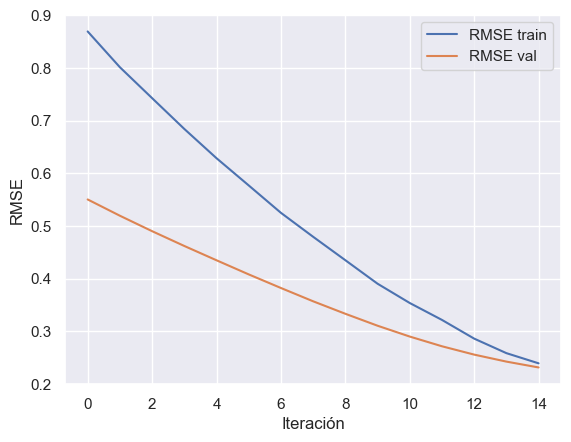

In [377]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

In [378]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.118
  RMSE test:	 0.219


In [364]:
# Predicciones
def predecir(modelo, x, scaler):
    # Realizar predicciones
    pred = modelo.predict(x)

    # Invertir el escalado
    pred_inv = scaler.inverse_transform(pred)
    return pred_inv

In [365]:
def generate_date_predictions(pred_tr, pred_ts, start):
    # Crear rango de fechas
    tr_rng = pd.date_range(start=start, periods=len(pred_tr), freq="D")
    ts_rng = pd.date_range(start=tr_rng[-1], periods=len(pred_ts), freq="D")

    return pd.DataFrame(pred_tr, index=tr_rng), pd.DataFrame(pred_ts, index=ts_rng)

In [379]:
# Realizar predicciones
pred_tr = predecir(modelo, x_tr_s, scaler_y)
pred_ts = predecir(modelo, x_ts_s, scaler_y)
tr_plot,ts_plot = generate_date_predictions(pred_tr,pred_ts,tr.index.min())

60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


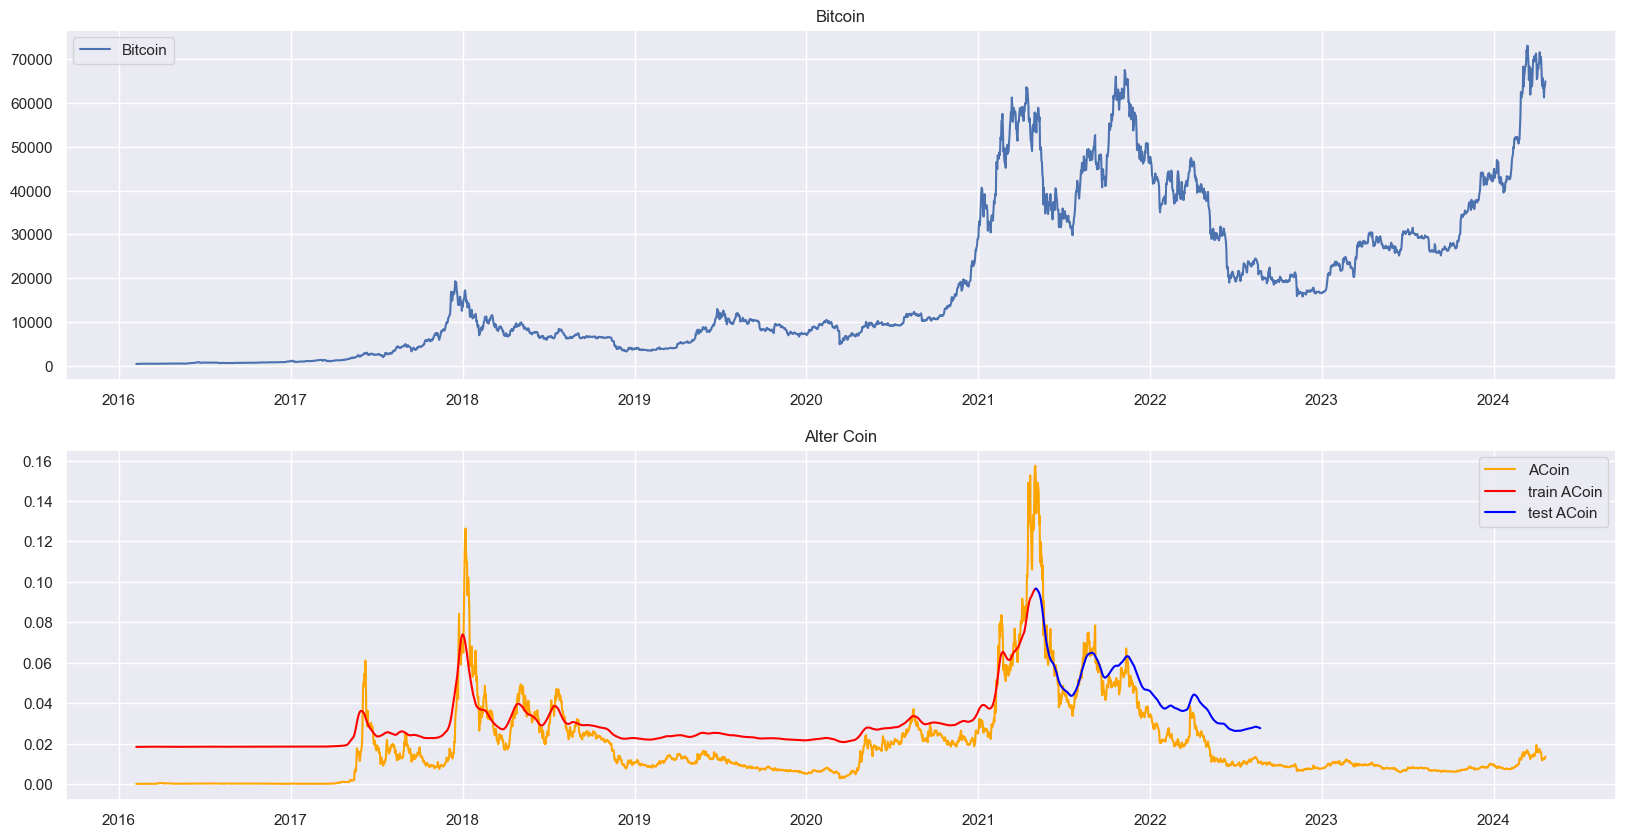

In [380]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
# ax = plt.gca()
# ax.set_yscale('log')
axs[0].plot(df_bitcoin["close"], label=f"Bitcoin")
axs[0].set_title(f"Bitcoin")
axs[0].legend()

# axs[1].plot(df_coin["close"], label=f"ACoin", color="orange")
axs[1].plot(df_coin["close"], label=f"ACoin", color="orange")
axs[1].plot(tr_plot[5], label=f"train ACoin", color="red")
axs[1].plot(ts_plot[5], label=f"test ACoin", color="blue")
axs[1].set_title(f"Alter Coin")
axs[1].legend()

In [368]:
def get_data_predict(data: pd.Series, input_length):
    X = [data.tail(input_length).values]
    return np.array(X)

In [321]:
# x = get_data_predict(df_coin[cols], INPUT_LENGTH)
# x_s = scalers.fit_transform(x.reshape(x.shape[0], -1)).reshape(x.shape)
# pred = modelo.predict(x_s)
# pred_reshaped = scaler_y.inverse_transform(pred)
# pred_reshaped.shape

In [369]:
def predict_future_days(days: int, df):
    x = get_data_predict(df[cols], INPUT_LENGTH)
    
    # Create input dataset
    predictions = []
    x_s = scalers.fit_transform(x.reshape(x.shape[0], -1)).reshape(x.shape)
    
    for _ in range(days):
        # Scale the input
        # Make predictions
        pred = modelo.predict(x_s)
    
        # Reshape pred to 2D for the scaler, then inverse transform and reshape back
        pred_reshaped = scaler_y.inverse_transform(pred)
        predictions.append(pred_reshaped[:,5][0])
        # print(pred_reshaped[0])
        # Update the input for the next prediction
        # first delete the latest element and insert the prediction
        x_s = np.delete(x_s, 0, axis=1)
        x_s = np.insert(x_s, INPUT_LENGTH-1, pred[0], axis=1)
        # print(x_s[0])

    # Create date range
    rng = pd.date_range(start=df.index[-1], periods=days, freq="D")
    # Create DataFrame from predictions
    df_pred = pd.DataFrame(predictions, index=rng)
    return df_pred

In [381]:
future_days = 150
pred_future = predict_future_days(future_days, df_coin)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

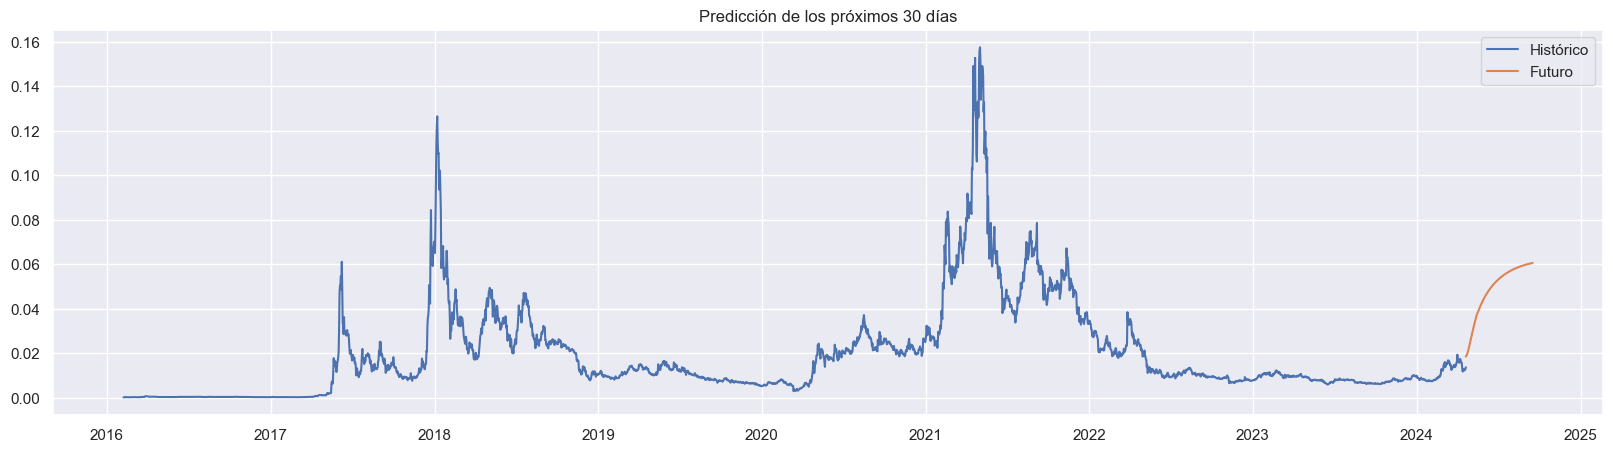

In [382]:
# graficamos el futuro
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(df_coin["close"], label='Histórico')
ax.plot(pred_future, label='Futuro')
ax.set_title('Predicción de los próximos 30 días')
plt.legend()
plt.show()